In [2]:
#1. How to load a CSV file into a Pandas DataFrame?
import pandas as pd
# Load a CSV file into a DataFrame
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)
print(df.head())  # Display the first 5 rows


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
#2. How to perform basic statistical exploration of a DataFrame?

# Explore basic statistics of the DataFrame
print(df.describe())  # Get statistical summaries of numerical columns

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [4]:
#3. How to handle missing values in a DataFrame?
# Check for missing values
print(df.isnull().sum())  # Count missing values in each column

# Fill missing values with the mean
df.fillna(df.mean(), inplace=True)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
#4. How to select specific columns from a DataFrame?
# Select specific columns from the DataFrame
selected_columns = df[['Pregnancies', 'SkinThickness']]
print(selected_columns.head())

   Pregnancies  SkinThickness
0            6             35
1            1             29
2            8              0
3            1             23
4            0             35


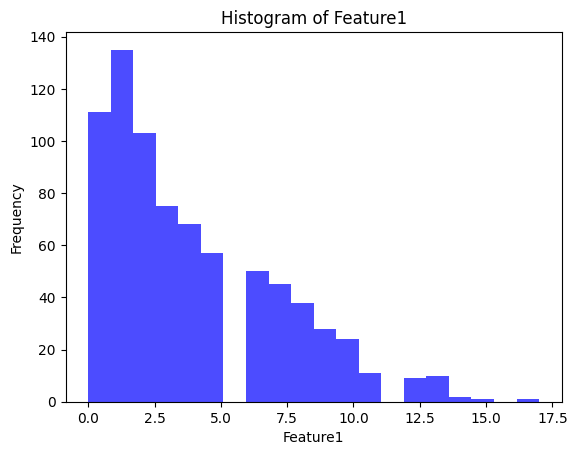

In [8]:
#5. How to create a histogram of a specific column in a DataFrame?
import matplotlib.pyplot as plt

# Plot a histogram of a specific column
plt.hist(df['Pregnancies'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Feature1')
plt.xlabel('Feature1')
plt.ylabel('Frequency')
plt.show()

In [10]:
#6. How to normalize features in a DataFrame?

from sklearn.preprocessing import MinMaxScaler

# Normalize the features
scaler = MinMaxScaler()
df[['BloodPressure', 'SkinThickness']] = scaler.fit_transform(df[['BloodPressure', 'SkinThickness']])
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148       0.590164       0.353535        0  33.6   
1            1       85       0.540984       0.292929        0  26.6   
2            8      183       0.524590       0.000000        0  23.3   
3            1       89       0.540984       0.232323       94  28.1   
4            0      137       0.327869       0.353535      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [12]:
#7. How to split data into training and testing sets?

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df[['Glucose', 'BloodPressure']]
y = df['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#8. How to implement a Linear Regression model?

from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
print(predictions)


[29.98048728 32.14101355 30.95062901 32.40229417 34.52533007 31.49179143
 27.939527   25.34915746 33.58471985 33.85721878 31.63350606 36.75642567
 32.21896576 31.39111462 29.57010916 30.34215672 30.712073   30.42097289
 28.05765306 32.35713294 31.71941712 31.43598786 31.61490487 30.45817527
 32.93195029 35.93538144 30.61849108 31.55526587 32.75686872 31.10384994
 34.28619809 33.81618097 35.37561783 27.40104807 33.60389701 34.06240784
 35.16275791 33.23072127 32.79023567 25.92368683 29.44699572 31.12571059
 32.01790011 31.53282925 32.90625421 34.12204684 31.82009393 31.16348894
 31.86113174 34.9242019  30.46939358 34.70808251 33.94312984 32.57737574
 32.03621332 29.92851914 33.56228323 23.83075841 32.04388418 33.41289774
 34.14448347 32.08492199 34.23806539 30.10743615 31.64501236 34.51027633
 29.46943234 36.24565872 31.90600499 33.95022473 32.86080499 31.97715029
 30.62616195 32.3763101  30.93202782 34.85037311 31.85374886 29.71182378
 31.50655719 33.64493483 33.2301453  30.78647776 29

In [14]:
#9. How to calculate the Mean Squared Error of the model?

from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 58.38042639507307


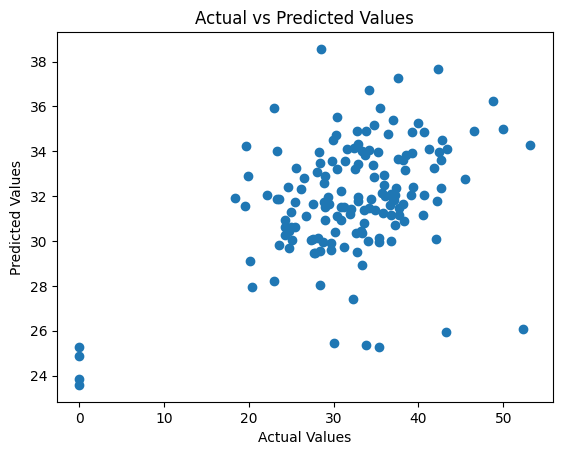

In [15]:
#10. How to visualize actual vs. predicted values?

# Plot Actual vs Predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [2]:
#11. How to load the IMDb dataset for sentiment analysis?

from keras.datasets import imdb
from keras.preprocessing import sequence

# Load the IMDb dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to ensure uniform input size
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

print(f'Loaded data: {X_train.shape}, {y_train.shape}')

Loaded data: (25000, 500), (25000,)


In [3]:
#12. How to build a custom LSTM model for sentiment classification?

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=500))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [4]:
#13. How to train the LSTM model on the IMDb dataset?

# Train the model
history = model.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test))

print('Training complete!')

391/391 ━━━━━━━━━━━━━━━━━━━━ 281s 714ms/step - accuracy: 0.7074 - loss: 0.5396 - val_accuracy: 0.5921 - val_loss: 0.6644
Training complete!


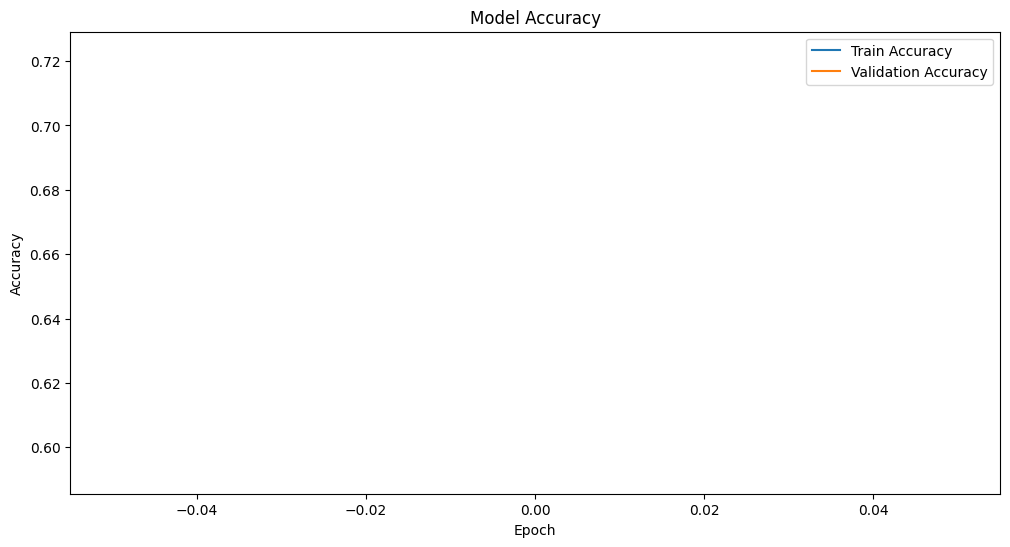

In [5]:
#14. How to visualize the training and validation accuracy?

import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


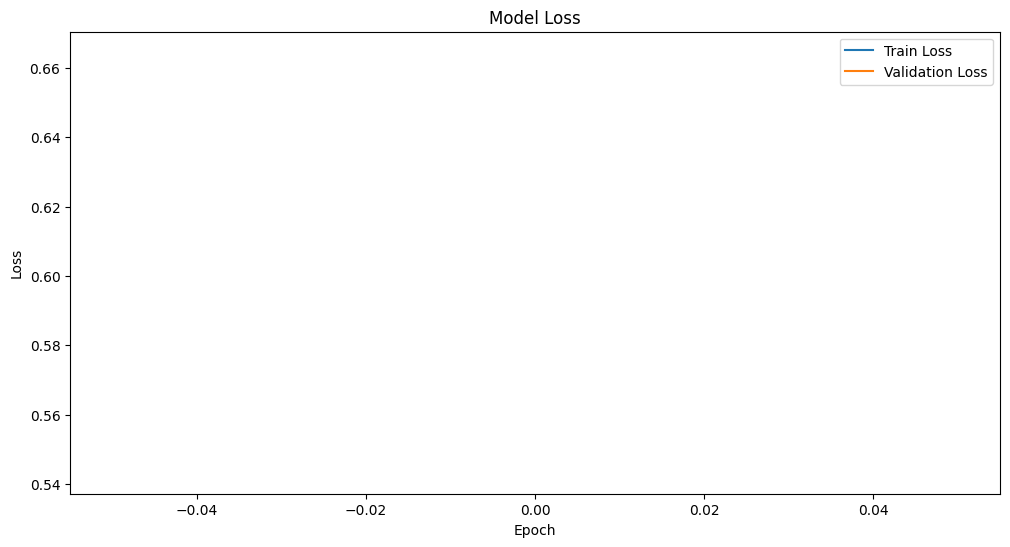

In [6]:
#15. How to visualize the training and validation loss?
# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [7]:
#16. How to evaluate the model on the test set?
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}, Test Loss: {test_loss:.2f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.5855 - loss: 0.6678
Test Accuracy: 0.59, Test Loss: 0.66


In [8]:
#17. How to make predictions with the trained LSTM model?

# Make predictions on test data
predictions = model.predict(X_test)

# Convert predictions to binary values (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

print(predicted_classes[:2])  # Display first 10 predictions

782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step
[[1]
 [1]]


In [9]:
#18. How to interpret the predictions using a classification report?

from sklearn.metrics import classification_report

# Generate classification report
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.78      0.26      0.39     12500
           1       0.56      0.93      0.69     12500

    accuracy                           0.59     25000
   macro avg       0.67      0.59      0.54     25000
weighted avg       0.67      0.59      0.54     25000



In [10]:
#19. How to save the trained LSTM model to disk?

# Save the model
model.save('lstm_sentiment_model.h5')
print('Model saved to disk.')

Model saved to disk.


In [11]:
#20. How to load the saved LSTM model and make predictions?
from keras.models import load_model

# Load the model
loaded_model = load_model('lstm_sentiment_model.h5')

# Make predictions with the loaded model
loaded_predictions = loaded_model.predict(X_test)
print(loaded_predictions[:10])  # Display first 10 predictions

782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step
[[0.5840858 ]
 [0.56376886]
 [0.4059156 ]
 [0.58360344]
 [0.67845917]
 [0.6483647 ]
 [0.5862253 ]
 [0.49626258]
 [0.5772863 ]
 [0.5143443 ]]
